<a href="https://colab.research.google.com/github/Chandumeghanajogi/Chandumeghana_FMML_LABS_PROJECTS/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

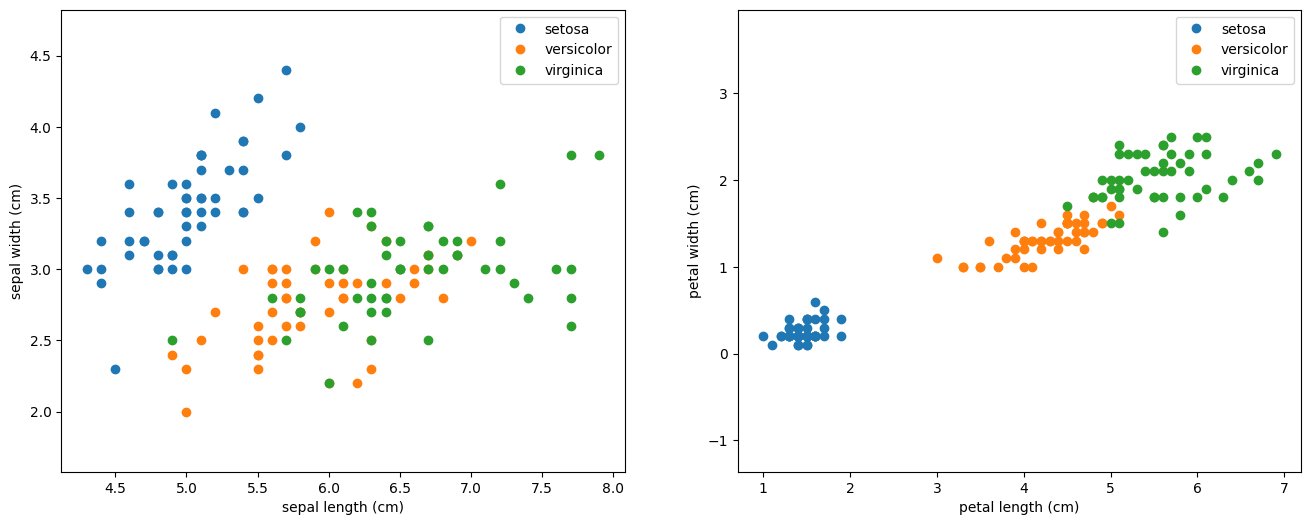

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 358.08it/s]


# Plot training progress

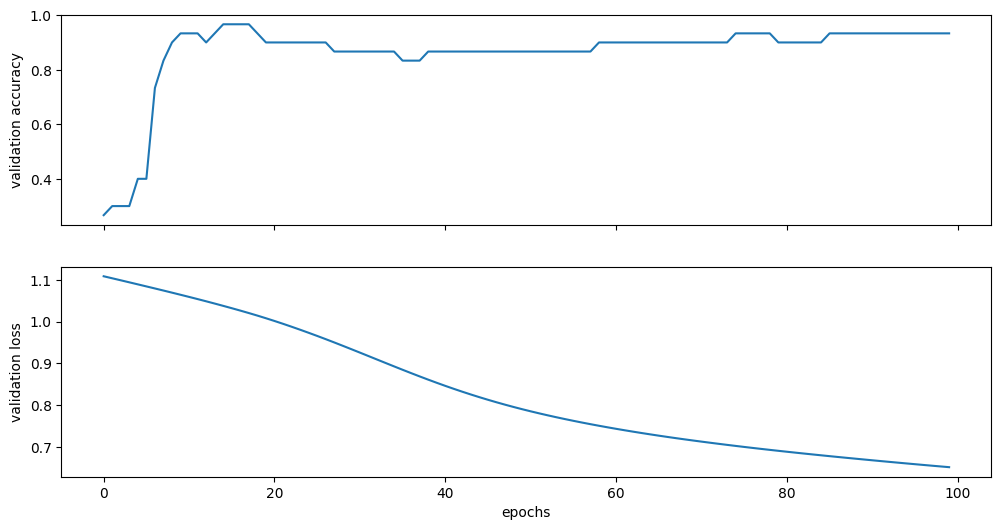

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

1st answer:

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self, input_dim, num_hidden_layers):
        super(Model, self).__init__()
        self.input_dim = input_dim
        self.num_hidden_layers = num_hidden_layers

        # Define the first hidden layer
        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(input_dim, 50))  # Example hidden layer size

        # Define additional hidden layers if num_hidden_layers > 1
        for _ in range(num_hidden_layers - 1):
            self.hidden_layers.append(nn.Linear(50, 50))  # Example hidden layer size

        # Define the output layer
        self.output_layer = nn.Linear(50, 3)  # Example output size

    def forward(self, x):
        x = x.view(-1, self.input_dim)  # Reshape input if needed
        for hidden_layer in self.hidden_layers:
            x = F.relu(hidden_layer(x))
        x = F.softmax(self.output_layer(x), dim=1)
        return x

# Instantiate the model with a different number of hidden layers
model = Model(input_dim=X_train.shape[1], num_hidden_layers=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()


In [ ]:
#assuming the values:

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Assuming X_train and y_train are your training data
# Define X_train and y_train as tensors if they are not already
X_train = torch.tensor([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9]])
y_train = torch.tensor([0, 1, 2])

# Model Definition
class Model(nn.Module):
    def __init__(self, input_dim, num_hidden_layers):
        super(Model, self).__init__()
        self.input_dim = input_dim
        self.num_hidden_layers = num_hidden_layers

        # Define the first hidden layer
        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(input_dim, 50))  # Example hidden layer size

        # Define additional hidden layers if num_hidden_layers > 1
        for _ in range(num_hidden_layers - 1):
            self.hidden_layers.append(nn.Linear(50, 50))  # Example hidden layer size

        # Define the output layer
        self.output_layer = nn.Linear(50, 3)  # Example output size

    def forward(self, x):
        x = x.view(-1, self.input_dim)  # Reshape input if needed
        for hidden_layer in self.hidden_layers:
            x = F.relu(hidden_layer(x))
        x = F.softmax(self.output_layer(x), dim=1)
        return x

# Instantiate the model with a different number of hidden layers
model = Model(input_dim=X_train.shape[1], num_hidden_layers=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Training
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing (Assuming X_test is your test data)
X_test = torch.tensor([[0.2, 0.3, 0.4], [0.5, 0.6, 0.7]])
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    print("Predicted labels:", predicted)


Epoch [10/100], Loss: 1.0893
Epoch [20/100], Loss: 1.0782
Epoch [30/100], Loss: 1.0641
Epoch [40/100], Loss: 1.0441
Epoch [50/100], Loss: 1.0178
Epoch [60/100], Loss: 0.9855
Epoch [70/100], Loss: 0.9497
Epoch [80/100], Loss: 0.9117
Epoch [90/100], Loss: 0.8729
Epoch [100/100], Loss: 0.8346
Predicted labels: tensor([0, 2])


2nd answer:

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Assuming X_train and y_train are your training data
# Define X_train and y_train as tensors if they are not already
X_train = torch.tensor([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9]])
y_train = torch.tensor([0, 1, 2])

# Model Definition
class Model(nn.Module):
    def __init__(self, input_dim, hidden_layer_size):
        super(Model, self).__init__()
        self.input_dim = input_dim
        self.hidden_layer_size = hidden_layer_size

        # Define the hidden layers
        self.layer1 = nn.Linear(input_dim, hidden_layer_size)
        self.layer2 = nn.Linear(hidden_layer_size, hidden_layer_size)

        # Define the output layer
        self.layer3 = nn.Linear(hidden_layer_size, 3)

    def forward(self, x):
        x = x.view(-1, self.input_dim)  # Reshape input if needed
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

# Instantiate the model with different parameters
model = Model(input_dim=X_train.shape[1], hidden_layer_size=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Training
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing (Assuming X_test is your test data)
X_test = torch.tensor([[0.2, 0.3, 0.4], [0.5, 0.6, 0.7]])
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    print("Predicted labels:", predicted)


Epoch [10/100], Loss: 1.0817
Epoch [20/100], Loss: 1.0576
Epoch [30/100], Loss: 1.0265
Epoch [40/100], Loss: 0.9866
Epoch [50/100], Loss: 0.9402
Epoch [60/100], Loss: 0.8916
Epoch [70/100], Loss: 0.8478
Epoch [80/100], Loss: 0.8101
Epoch [90/100], Loss: 0.7736
Epoch [100/100], Loss: 0.7358
Predicted labels: tensor([0, 2])


#3rd answer:

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Assuming X_train and y_train are your training data
# Define X_train and y_train as tensors if they are not already
X_train = torch.tensor([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9]])
y_train = torch.tensor([0, 1, 2])

# Model Definition
class Model(nn.Module):
    def __init__(self, input_dim, hidden_layer_size, activation):
        super(Model, self).__init__()
        self.input_dim = input_dim
        self.hidden_layer_size = hidden_layer_size
        self.activation = activation

        # Define the hidden layers
        self.layer1 = nn.Linear(input_dim, hidden_layer_size)
        self.layer2 = nn.Linear(hidden_layer_size, hidden_layer_size)

        # Define the output layer
        self.layer3 = nn.Linear(hidden_layer_size, 3)

    def forward(self, x):
        x = x.view(-1, self.input_dim)  # Reshape input if needed
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

# Instantiate the model with different parameters
model = Model(input_dim=X_train.shape[1], hidden_layer_size=64, activation=torch.tanh)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Training
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = loss_fn(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Testing (Assuming X_test is your test data)
X_test = torch.tensor([[0.2, 0.3, 0.4], [0.5, 0.6, 0.7]])
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    print("Predicted labels:", predicted)



Epoch [10/100], Loss: 1.0595
Epoch [20/100], Loss: 1.0093
Epoch [30/100], Loss: 0.9459
Epoch [40/100], Loss: 0.8807
Epoch [50/100], Loss: 0.8226
Epoch [60/100], Loss: 0.7649
Epoch [70/100], Loss: 0.7074
Epoch [80/100], Loss: 0.6567
Epoch [90/100], Loss: 0.6191
Epoch [100/100], Loss: 0.5947
Predicted labels: tensor([0, 1])
